# <font color='orange'>House Prices - Advanced Regression Techniques</font>
<font color='orange'>Matej Šembera, 20.8.2022</font>

***
<br>

**Introduction:** This project is my solution to the competition called House Prices - Advanced Regression Techniques, which is accessible on Kaggle. 

__[link to the competition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)__

**Goal:** In this competition we will try to predict the sale price of homes using machine learning. 

**Sections**: Before we will dive in the machine learning we will try to explore and prepare the data. To make this notebook transparent, I divided it into several parts. <br>

1. Importing libraries, files and getting know the data<br>
2. Data cleaning
3. Exploratory Data Analysis
4. Machine learning
5. Conclusion

## <font color='orange'>1. Importing libraries, files and getting know the data</font>

In [2]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#feature engineering
from sklearn.preprocessing import OneHotEncoder

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

#importing learning methods
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#importing data
data = pd.read_csv("C:\\Users\\sembm\\OneDrive\\Dokumenty\\Data_Science\\Files\\train_copy.csv")

In [3]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The file has been successfully loaded.

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# the most import column of our data is the Sale price column. We will print some basic statistics.
data["SalePrice"].describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can see that the lowest sale price was 34 900 dollars. I am glad that the database does not contain any houses that have been sold for zero or even negative numbers. 

## <font color='orange'>2. Data cleaning</font>

In [6]:
#firstly, we will get to know how much data is missing

#calculating what percentage of data is missing
missing_data = (data.isnull().sum() / len(data)) * 100
missing_data = missing_data.sort_values(ascending=False)
print(missing_data.head(20))

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64


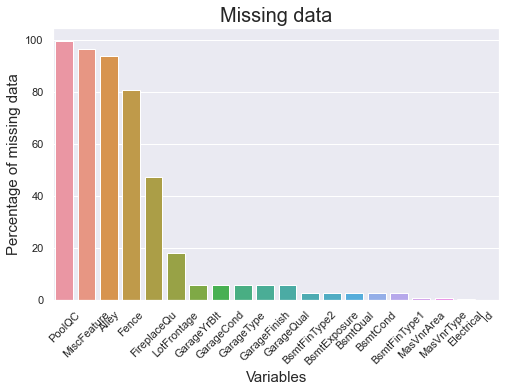

In [48]:
#plotting missing data
missing_data_30 = missing_data.head(20)
f, ax = plt.subplots(figsize=(8, 5))
graph = sns.barplot(x=missing_data_30.index, y=missing_data_30)
ax.set_xlabel("Variables", fontsize=15)
ax.set_ylabel("Percentage of missing data", fontsize=15)
ax.set_title("Missing data", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Now we got some basic understanding of the data that is missing. In order to proceed to machine learning we will have to first full the missing values. 

In [8]:
# In order to use fillna method we will have to convert our data to dataframe 
data_df = pd.DataFrame(data)

# Now we can start filling missing values

# In the data column PoolQC is missing value given every time when the house does not have a pool. 
# Therefore, we will replace it with None.
data_df['PoolQC'] = data_df['PoolQC'].fillna("None")

#The same method we applied on PoolQC we will apply on MiscFeature, Alley, 
#Fence, FireplaceQu and LotFrontage
data_df['MiscFeature'] = data_df['MiscFeature'].fillna("None")
data_df['Alley'] = data_df['Alley'].fillna("None")
data_df['Fence'] = data_df['Fence'].fillna("None")
data_df['FireplaceQu'] = data_df['FireplaceQu'].fillna("None")
data_df['LotFrontage'] = data_df['LotFrontage'].fillna("None")

#to check 
print(data_df.head())

   Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.0     8450   Pave  None      Reg   
1   2          20       RL        80.0     9600   Pave  None      Reg   
2   3          60       RL        68.0    11250   Pave  None      IR1   
3   4          70       RL        60.0     9550   Pave  None      IR1   
4   5          60       RL        84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         

Earlier we printed the first 20 rows of missing data in descending order. We can see that the 20th row is id, where zero values are missing. Therefore, we can conclude that the data is missing only in 19 columns. 

In [9]:
# In the Garage columns (GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual) the missing
# value is given when the house does not contain a garage. Because of this we will fill it with fillna 
# method and replace it by None. However, the GarageYrBlt column contains the year the garage was build. 
#In order not to have missing values we will replace every missing value with mean of the whole column

for column in ("GarageCond", "GarageType", "GarageFinish", "GarageQual"):
          data_df[column] = data_df[column].fillna("None")
        
data_df_GarageYrBlt_mean = data["GarageYrBlt"].mean()
data["GarageYrBlt"] = data["GarageYrBlt"].fillna(data_df_GarageYrBlt_mean)


In [10]:
#Similarly, as above the missing value is given in Basement columns (BsmtFinType2, BsmtExposure, 
#BsmtQual, BsmtCond, BsmtFinType1) if there is no basement. We will replace it by None. 

for column in ("BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"):
          data_df[column] = data_df[column].fillna("None")

In [11]:
#the missing value is given when there is no Masonry veneer
for column in ("MasVnrArea", "MasVnrType"):
          data_df[column] = data_df[column].fillna("None")
        

In [12]:
# in around 0.06% data there is no information about the electrical system. We will replace it with 
#mode of the column
data_df["Electrical"] = data_df["Electrical"].fillna(data_df["Electrical"].mode())

In [13]:
#we will check if there is any remaining data in the dataframe
missing_data_df = data_df.isnull() .sum()
print(missing_data_df.sum())

1


In [14]:
#as we can see there is still one missing value. We will print the row where the data is missing
null_data = data_df[data_df.isnull().any(axis=1)]
print(null_data.to_string())

        Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
1379  1380          80       RL        73.0     9735   Pave  None      Reg         Lvl    AllPub    In

In [15]:
# we can see that the house id 1379 has missing data in the Electrical column. Because it 
#is just one row we will replace it with Mixed. 
data_df["Electrical"] = data_df["Electrical"].fillna("Mixed")
missing_data_df = data_df.isnull().sum()
print(missing_data_df.sum())

0


Great. We do not have any missing data. But the data should be in numerical format. However, there few things that machine learning would probably not get right. For example, the column MSSubClass, which identifies the kind of dwelling involved in the sale. The categories are represented by numbers: 20, 30, 40.... We do not want our model to look at the magnitude of these numbers, but rather see them as categories. Therefore we will convert the whole column to a category. The same applies to year and month columns. We would the to be seen as categories.

In [16]:
data_df["MSSubClass"] = data_df["MSSubClass"].astype("category")
data_df["YrSold"] = data_df["YrSold"].astype("category")
data_df["MoSold"] = data_df["MoSold"].astype("category")

## <font color='orange'>3. Exploratory Data Analysis</font>


In this section we will explore the quality of our data. As the most important column of the whole dataframe is the SalePrice column, we will focus on that. We will try to find a distribution for the SalePrice column. 

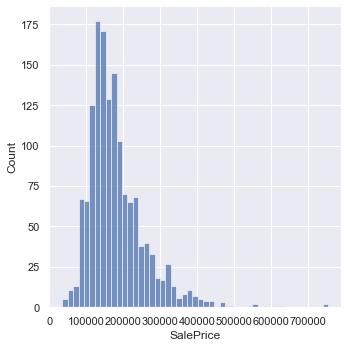

In [17]:
sns.set()
sns.displot(data_df["SalePrice"])
plt.show()

We can see that the histogram is right skewed. We will try to get a normal distribution by compressing outliers using log transform. 

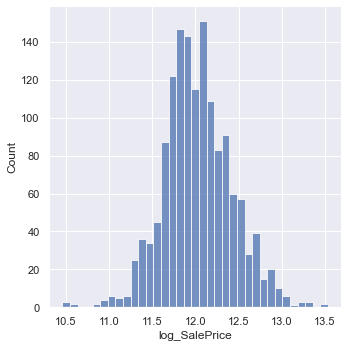

In [18]:
data_df["log_SalePrice"] = np.log(data_df["SalePrice"])
sns.displot(data_df["log_SalePrice"])
plt.show()

Now it looks as the SalePrice column is normally distributed. In order to get more insight to the data, we will also plot a correlation matrix. 

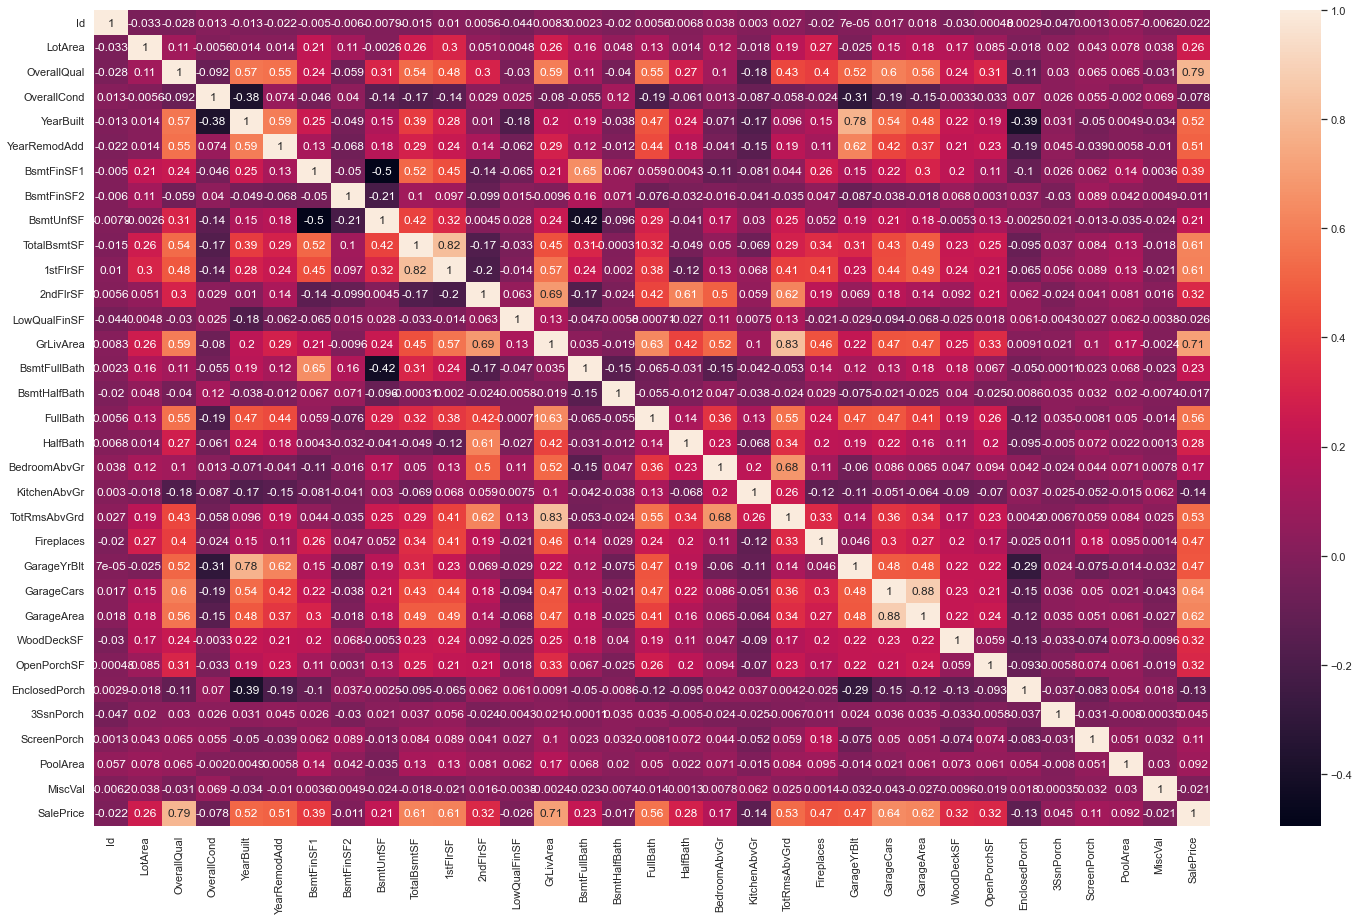

In [27]:
corrMatrix = data.corr()
f, ax = plt.subplots(figsize = (25, 15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

We can see at the bottom of the correlation matrix a good correlation between SalePrice column and OverallQual, YearBuilt, GrLivArea, GarageArea and other columns. A correlation does not however mean a causality. But it is good to get a overview. No correlations look suspicious here.

## <font color='orange'>4. Machine Learning</font>

We will use supervised machine learning. For start we will predict the SalePrice just by location as I remember that the real estate is just about location, location and location. 

In [53]:
X_1 = data_df["GrLivArea"].values
y_1 = data_df["SalePrice"].values

X_1 = X_1.reshape(-1, 1)

reg = LinearRegression()

We will try several different techniques. In order not to repeat the machine learning process, we will define a function. 

In [54]:
def machine_learning(X, y, learning_method):
    """
    Does make a machine learning process.  

    Args:
       X: independent variable in our machine learning 
       y: dependent variable in our machine learning 
       learning_method: what kind of learning method do we want to use. For example: LinearRegression, RandomForestRegressor...

    Returns:
       First Line: different variation scores 
       Second: mean squared error of our model
       Third: returns dataframe: First column: real price. 
                           Second column: our predicted price
                           Third column: the percantage difference between our prediction and real price
    """
    y = y.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    cv_results = cross_val_score(learning_method, X, y, cv=kf)

    learning_method.fit(X_train, y_train)

    y_pred = learning_method.predict(X_test)
    error = mean_squared_error(y_test, y_pred, squared=False)
    print(cv_results)
    print(error)
    
    y_test = y_test.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)
    
    labels = np.hstack((y_test, y_pred))
    label = pd.DataFrame(labels, columns = ['Real','Predicted'])
    label["Percantage"] = label["Real"] / label["Predicted"] * 100
    print(label[:10])  

In [55]:
machine_learning(X_1, y_1, reg)

[0.56919282 0.58047859 0.43864087 0.41247933 0.40825883 0.55730733]
55989.227138773305
       Real      Predicted  Percantage
0  154500.0  134841.223174  114.579204
1  325000.0  291411.006872  111.526330
2  115000.0  130811.112912   87.913020
3  159000.0  194889.866085   81.584540
4  315500.0  190456.744797  165.654412
5   75500.0   90711.515800   83.230888
6  311500.0  224108.165488  138.995382
7  146000.0  173933.292720   83.940227
8   84500.0   90711.515800   93.152451
9  135500.0  167585.869057   80.854072


We can see that the difference between our model prediction and the real data is around 55 000 thousand dollars. Given that we predicted it with just one variable, one Ukrainian Physicist would say "not great, not terrible". Maybe at the end the location in property location has huge impact on price, but that it is not everything.

Now we will include other parameters to our model: YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, OverallQual, TotRmsAbvGrd and GarageArea.

In [56]:
columns = ["GrLivArea", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", 
           "1stFlrSF", "OverallQual", "TotRmsAbvGrd", "GarageArea"]
X_2 = data_df[columns].values
y_2 = data_df["SalePrice"].values

machine_learning(X_2, y_2, reg)

[0.79105639 0.81522062 0.71894644 0.60950497 0.81499613 0.81687591]
37094.51222820447
       Real      Predicted  Percantage
0  154500.0  150264.205115  102.818898
1  325000.0  298125.639320  109.014441
2  115000.0  104995.232932  109.528782
3  159000.0  161896.863724   98.210673
4  315500.0  294318.101695  107.196940
5   75500.0   58134.039790  129.872275
6  311500.0  209820.912717  148.459939
7  146000.0  166884.141620   87.485844
8   84500.0   56980.621619  148.296030
9  135500.0  124287.522541  109.021402


As we can see now our model can predict around 80% variance of SalePrice. Our error difference decreased from 55 000 dollars to only 37 000 dollars. Can make the error as low as 15 000 thousand dollars? Lets try!
We can on the histogram that represents the SalePrice column that there have been sold two expensive properties. One for around 550 000 and one for 750 000. This two properties can mislead our error. For example, it is big difference to make an 37 000 thousand error on property that is worth 100 000 than on the property that is worth 700 000. In order to avoid this, we will exclude this two properties from the dataset.

In [57]:
data_new = data_df[data_df["SalePrice"] <= 400000]
X_3 = data_new[columns].values
y_3 = data_new["SalePrice"].values

machine_learning(X_3, y_3, reg)

[0.81828854 0.81210736 0.57331303 0.77847301 0.7703308  0.82799639]
28527.58658256481
       Real      Predicted  Percantage
0  181000.0  193213.346901   93.678829
1  229456.0  233429.702480   98.297688
2  190000.0  211869.958558   89.677650
3  130000.0  135944.672357   95.627138
4  126000.0  137462.048485   91.661663
5  159434.0  134533.660987  118.508631
6  200000.0  217291.881072   92.042095
7  315000.0  290873.199200  108.294611
8  129500.0  112580.369314  115.028935
9  214000.0  223431.219593   95.778916


Now we can see that when we dropped the properties that sold for more than 400 000 the error decreased from 37 000 to 28 000. Up to this point we used only few features, but now we will use the whole dataset. To be able to do that we will have to convert the whole dataset to integers. 

In [58]:
columns = ["LotArea", "OverallQual", "OverallCond", "BsmtFinSF1", "BsmtUnfSF", "YearBuilt", "YearRemodAdd",
           "TotalBsmtSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "TotRmsAbvGrd",
           "BsmtHalfBath", "FullBath", "HalfBath", "GarageArea", "BedroomAbvGr", "KitchenAbvGr", 
           "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", 
          "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

data_new = data_df[data_df["SalePrice"] <= 400000]
X_4 = data_new[columns].values
y_4 = data_new["SalePrice"].values

machine_learning(X_4, y_4, reg)

[0.83289216 0.83698725 0.58986065 0.81006219 0.80336013 0.83866907]
27192.228211404712
       Real      Predicted  Percantage
0  181000.0  196207.498353   92.249278
1  229456.0  227376.339879  100.914633
2  190000.0  223840.934985   84.881704
3  130000.0  123506.925430  105.257255
4  126000.0  118344.908663  106.468459
5  159434.0  111214.014894  143.357831
6  200000.0  205345.529871   97.396812
7  315000.0  303133.436058  103.914634
8  129500.0  121358.925567  106.708262
9  214000.0  201766.642721  106.063122


We put lot more columns, but our error decreased by just one tausend dollars. Previously I was thinking to transform all the columns into integers using OneHotEncounter, but I personally think that it will not increase the effectiveness of our model. Instead of that we will try different models. Let’s try RandomForest.

In [59]:
rfg = RandomForestRegressor()
machine_learning(X_4, y_4, rfg)

C:\Users\sembm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sembm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sembm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sembm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

[0.88221753 0.87733444 0.80495218 0.81107997 0.88376326 0.90718626]
23329.47146562498
       Real  Predicted  Percantage
0  181000.0  177584.85  101.923109
1  229456.0  244628.82   93.797616
2  190000.0  199291.67   95.337653
3  130000.0  115823.59  112.239657
4  126000.0  133267.00   94.547037
5  159434.0  133381.75  119.532095
6  200000.0  168952.12  118.376733
7  315000.0  343128.54   91.802332
8  129500.0  120698.18  107.292421
9  214000.0  214573.41   99.732767


In [60]:
dtc = DecisionTreeClassifier()
machine_learning(X_4, y_4, dtc)

[0.0083682  0.0083682  0.0083682  0.0125523  0.01260504 0.00420168]
41295.71108148619
     Real  Predicted  Percantage
0  181000     172785  104.754464
1  229456     185000  124.030270
2  190000     129000  147.286822
3  130000      87000  149.425287
4  126000     128500   98.054475
5  159434     165000   96.626667
6  200000     243000   82.304527
7  315000     320000   98.437500
8  129500     120500  107.468880
9  214000     260400   82.181260


## <font color='orange'>5. Conclusion</font>

Our model best works with RandomForest learning method. The mean standard error is around 23 000 dollars and the variance is around 85%.